In [1]:
import pandas as pd
# from pandas.io.json import json_normalize  
import scienceplots
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
DATA_PATH = './data'
model_dict = {
    "gpt-3.5-turbo": "GPT-3.5",
    "gpt-4-turbo-preview": "GPT-4"
}
dir = os.listdir(DATA_PATH)
df = pd.DataFrame(columns=["nblocks", "model", "acc", "iters"])
df_iters = pd.DataFrame(columns=["nblocks", "model", "iters"])
for file in dir:
    if file.startswith('exp'):
        with open(os.path.join(DATA_PATH, file), 'r') as f:
            data = json.load(f)
            results = data['results']
            if 'fuzzing' in data and data['fuzzing']:
                continue
            for model in results:
                acc = 0
                iters = 0
                count = len(results[model])
                for expi in results[model]:
                    if expi['solved']:
                        acc += 1
                        # iters += expi['iters'] if expi["iters"] > 0 else 1
                        # df_iters = df_iters._append({"nblocks": data["meta"], 'model': model_dict[model], "iters": expi['iters'] if expi["iters"] > 0 else 1}, ignore_index=True)
                    iters += expi['iters'] if expi["iters"] > 0 else 1


                # if data["meta"] in df["nblocks"].tolist() and model in df["model"].tolist():
                #     df.loc[(df["nblocks"] == data["meta"]) & (df["model"] == model), "acc"] += acc
                # else:
                df = df._append({"nblocks": data["meta"], 'model': model_dict[model], "acc": acc / count, "iters": float(iters)/count}, ignore_index=True)

df = df.groupby('nblocks').apply(lambda x: x.iloc[::-1]).reset_index(drop=True)
df = df.groupby(['nblocks', 'model']).mean()

# df_iters = df_iters.groupby('nblocks').apply(lambda x: x.iloc[::-1]).reset_index(drop=True)
# df_iters = df_iters.groupby(['nblocks', 'model']).mean()

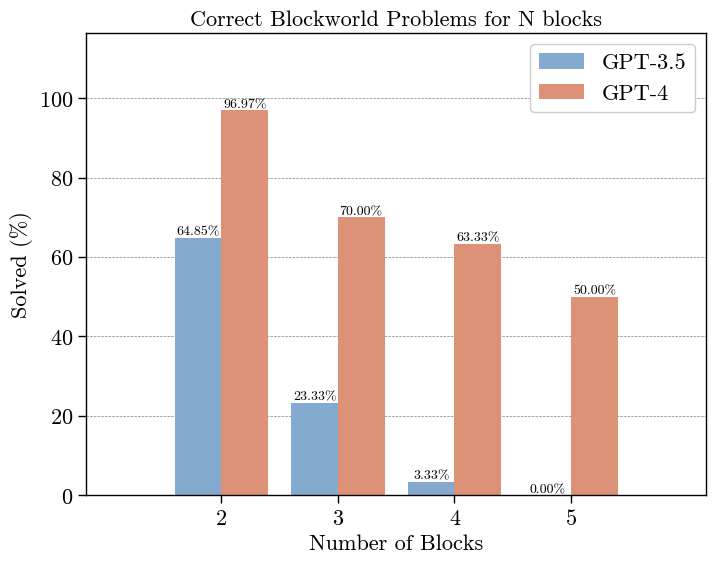

In [3]:
# reverse each nblocks group
df_acc = df * 100
plt.style.use(['notebook', 'no-latex', 'grid', 'light'])
ax = sns.barplot(data=df_acc, x='nblocks', y='acc', hue='model')

plt.title(f'Correct Blockworld Problems for N blocks')
plt.xlabel('Number of Blocks')
plt.ylabel('Solved (%)')

alabels=[f"{a:.2f}%" for a in df_acc.query('model == "GPT-3.5"')['acc']]
blabels=[f"{a:.2f}%" for a in df_acc.query('model == "GPT-4"')['acc']]
ax.bar_label(ax.containers[0], fmt=f"%.2f", labels=alabels, fontsize=10)
ax.bar_label(ax.containers[1], fmt=f"%.2f", labels=blabels, fontsize=10)
ax.margins(0.2, 0.2)
plt.legend(frameon=True)
plt.show()

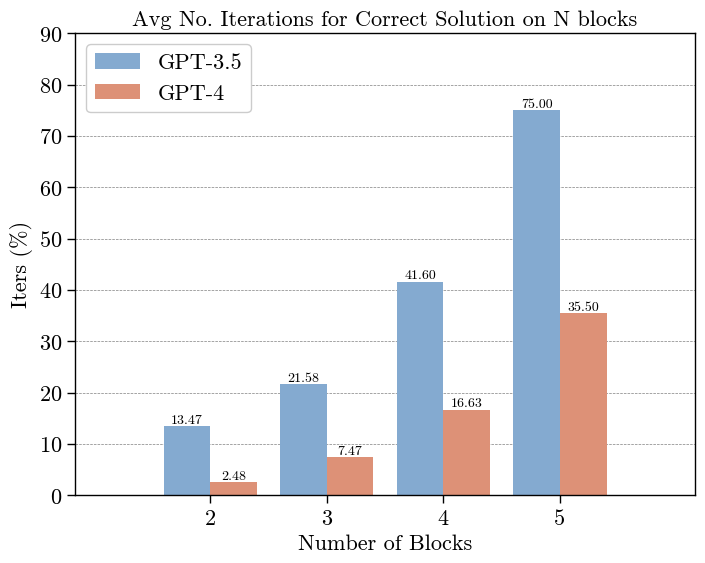

In [4]:
# reverse each nblocks group
df_iter = df
plt.style.use(['notebook', 'no-latex', 'grid', 'light'])
ax = sns.barplot(data=df_iter, x='nblocks', y='iters', hue='model')

plt.title(f'Avg No. Iterations for Correct Solution on N blocks')
plt.xlabel('Number of Blocks')
plt.ylabel('Iters (%)')

alabels=[f"{a:.2f}" for a in df_iter.query('model == "GPT-3.5"')['iters']]
blabels=[f"{a:.2f}" for a in df_iter.query('model == "GPT-4"')['iters']]
ax.bar_label(ax.containers[0], fmt=f"%.2f", labels=alabels, fontsize=10)
ax.bar_label(ax.containers[1], fmt=f"%.2f", labels=blabels, fontsize=10)
ax.margins(0.2, 0.2)
plt.legend(frameon=True)
plt.show()

In [5]:
DATA_PATH = './data'
model_dict = {
    "gpt-3.5-turbo": "GPT-3.5",
    "gpt-4-turbo-preview": "GPT-4"
}
dir = os.listdir(DATA_PATH)
df = pd.DataFrame(columns=["nblocks", "model", "acc", "iters"])
df_iters = pd.DataFrame(columns=["nblocks", "model", "iters"])
for file in dir:
    if file.startswith('exp'):
        with open(os.path.join(DATA_PATH, file), 'r') as f:
            data = json.load(f)
            results = data['results']
            suffix = ''
            if 'fuzzing' in data and data['fuzzing']:
                suffix = '-fuzzing'
            for model in results:
                acc = 0
                iters = 0
                count = len(results[model])
                for expi in results[model]:
                    if expi['solved']:
                        acc += 1
                        # iters += expi['iters'] if expi["iters"] > 0 else 1
                        # df_iters = df_iters._append({"nblocks": data["meta"], 'model': model_dict[model], "iters": expi['iters'] if expi["iters"] > 0 else 1}, ignore_index=True)
                    iters += expi['iters'] if expi["iters"] > 0 else 1


                # if data["meta"] in df["nblocks"].tolist() and model in df["model"].tolist():
                #     df.loc[(df["nblocks"] == data["meta"]) & (df["model"] == model), "acc"] += acc
                # else:
                df = df._append({"nblocks": data["meta"], 'model': model_dict[model] + suffix, "acc": acc / count, "iters": float(iters)/count}, ignore_index=True)

# df = df.groupby('nblocks').apply(lambda x: x.iloc[::-1]).reset_index(drop=True)
df = df.groupby(['nblocks', 'model']).mean()

# df_iters = df_iters.groupby('nblocks').apply(lambda x: x.iloc[::-1]).reset_index(drop=True)
# df_iters = df_iters.groupby(['nblocks', 'model']).mean()
df

acc      iters
nblocks model                               
2       GPT-3.5          0.648485  13.466667
        GPT-3.5-fuzzing  1.000000   1.727273
        GPT-4            0.969697   2.484848
        GPT-4-fuzzing    1.000000   1.090909
3       GPT-3.5          0.233333  21.583333
        GPT-3.5-fuzzing  0.700000  21.700000
        GPT-4            0.700000   7.466667
        GPT-4-fuzzing    0.900000  10.900000
4       GPT-3.5          0.033333  41.600000
        GPT-3.5-fuzzing  0.100000  45.600000
        GPT-4            0.633333  16.633333
        GPT-4-fuzzing    0.700000  18.600000
5       GPT-3.5          0.000000  75.000000
        GPT-3.5-fuzzing  0.000000  50.000000
        GPT-4            0.500000  35.500000
        GPT-4-fuzzing    0.800000  12.200000

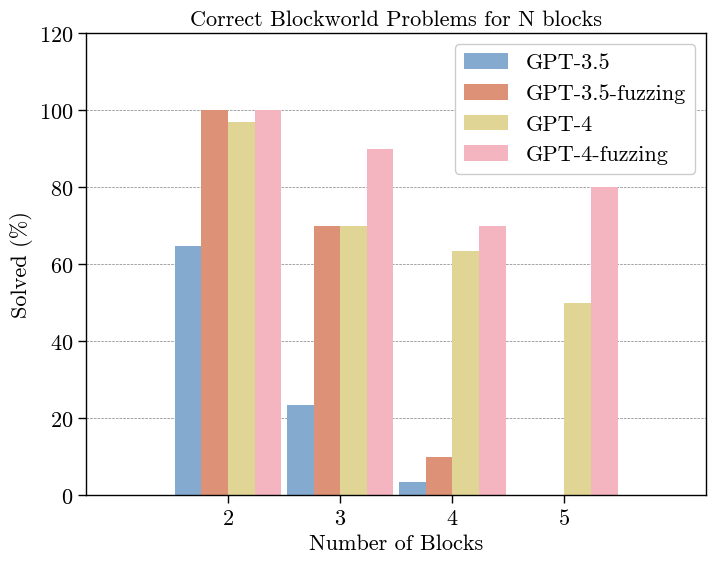

In [15]:
# reverse each nblocks group
df_acc = df * 100
plt.style.use(['notebook', 'no-latex', 'grid', 'light'])
ax = sns.barplot(data=df_acc, x='nblocks', y='acc', hue='model',  width=0.95)
plt.title(f'Correct Blockworld Problems for N blocks')
plt.xlabel('Number of Blocks')
plt.ylabel('Solved (%)')

# alabels=[f"{a:.2f}%" for a in df_acc.query('model == "GPT-3.5"')['acc']]
# clabels=[f"{a:.2f}%" for a in df_acc.query('model == "GPT-3.5-fuzzing"')['acc']]
# blabels=[f"{a:.2f}%" for a in df_acc.query('model == "GPT-4"')['acc']]
# dlabels=[f"{a:.2f}%" for a in df_acc.query('model == "GPT-4-fuzzing"')['acc']]
# ax.bar_label(ax.containers[0], fmt=f"%.2f", labels=alabels, fontsize=6)
# ax.bar_label(ax.containers[1], fmt=f"%.2f", labels=clabels, fontsize=6)
# ax.bar_label(ax.containers[2], fmt=f"%.2f", labels=blabels, fontsize=6)
# ax.bar_label(ax.containers[3], fmt=f"%.2f", labels=dlabels, fontsize=6)
ax.margins(0.2, 0.2)
plt.ylim(0, 100)
# plt.figure.set_size_inches(18.5, 10.5, forward=True)
plt.legend(frameon=True)
plt.show()